<a href="https://colab.research.google.com/github/alimirash/Logistic_Regression_Model_for_Stock_Price_Prediction/blob/main/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Load the CSV data
url = "/content/sample_data/EURUSD_M1.csv"
columns = ["Date","Open","High","Low","Close","Volume"]
df = pd.read_csv(url, names =columns,index_col=0)
df.index = pd.to_datetime(df.index, format="%Y-%m-%d %H:%M")

In [ ]:
# Create a binary target variable based on price change
df['Target'] = (df["Close"].shift(-1) > df["Close"]).astype(int)

# Calculate percentage return
df['Percentage Return'] = df['Close'].pct_change()*10000

# Create lag features and lag volume
df['Lag1']=np.nan
df['Lag2']=np.nan
df['Lag3']=np.nan
df['Lag4']=np.nan
df['Lag5']=np.nan
df['LagVolume']=np.nan

for i in range(150, 100000):
    df.iloc[i, df.columns.get_loc('Lag1')] = df.iloc[i - 5, df.columns.get_loc('Percentage Return')]
    df.iloc[i, df.columns.get_loc('Lag2')] = df.iloc[i - 10, df.columns.get_loc('Percentage Return')]
    df.iloc[i, df.columns.get_loc('Lag3')] = df.iloc[i - 15, df.columns.get_loc('Percentage Return')]
    df.iloc[i, df.columns.get_loc('Lag4')] = df.iloc[i - 20, df.columns.get_loc('Percentage Return')]
    df.iloc[i, df.columns.get_loc('Lag5')] = df.iloc[i - 25, df.columns.get_loc('Percentage Return')]
    df.iloc[i, df.columns.get_loc('LagVolume')] = df.iloc[i - 15, df.columns.get_loc('Volume')]

# Create the target variable again (it was overwritten above)
df['Target'] = (df["Close"].shift(-1) > df["Close"]).astype(int)
df.dropna()

,Open,High,Low,Close,Volume,Target,Percentage Return,Lag1,Lag2,Lag3,Lag4,Lag5,LagVolume
Date,,,,,,,,,,,,,
2023-04-18 11:53:00,1.09692,1.09702,1.09692,1.09701,245,1,0.820479,-0.455739,1.093813,0.729308,-0.364544,-0.182320,292.0
2023-04-18 11:54:00,1.09700,1.09716,1.09696,1.09714,595,0,1.185039,-0.182304,1.367116,0.000000,0.820255,-0.273486,96.0
2023-04-18 11:55:00,1.09715,1.09726,1.09703,1.09709,365,0,-0.455730,-1.731917,-0.455643,0.091157,-2.278299,1.914451,177.0
2023-04-18 11:56:00,1.09709,1.09709,1.09685,1.09688,252,0,-1.914155,0.820524,-2.278320,0.273468,-1.549596,0.820322,109.0
2023-04-18 11:57:00,1.09689,1.09696,1.09666,1.09674,306,0,-1.276347,-0.273486,0.638075,0.273461,0.364667,0.364558,162.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-25 08:55:00,1.10661,1.10661,1.10632,1.10642,422,0,-1.807305,1.717048,0.000000,-0.451802,0.542334,0.271162,468.0
2023-07-25 08:56:00,1.10642,1.10648,1.10631,1.10637,205,1,-0.451908,1.264976,0.000000,-0.903644,1.717297,-1.175003,272.0
2023-07-25 08:57:00,1.10637,1.10656,1.10637,1.10654,150,0,1.536556,-0.180688,0.361507,0.090373,0.451843,-0.994350,279.0


In [ ]:
# Create a logistic regression model with balanced class weights
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X = df.drop("Target", axis=1).fillna(0)
Y = df['Target']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.01, random_state=2023)

# Fit the model on the training data
model = LogisticRegression(class_weight='balanced')
model.fit(X_train,Y_train)
predictions = model.predict(X_test)
# Print classification report
print(classification_report(Y_test,predictions))


              precision    recall  f1-score   support

           0       0.57      0.64      0.61       548
           1       0.49      0.42      0.45       452

    accuracy                           0.54      1000
   macro avg       0.53      0.53      0.53      1000
weighted avg       0.54      0.54      0.54      1000



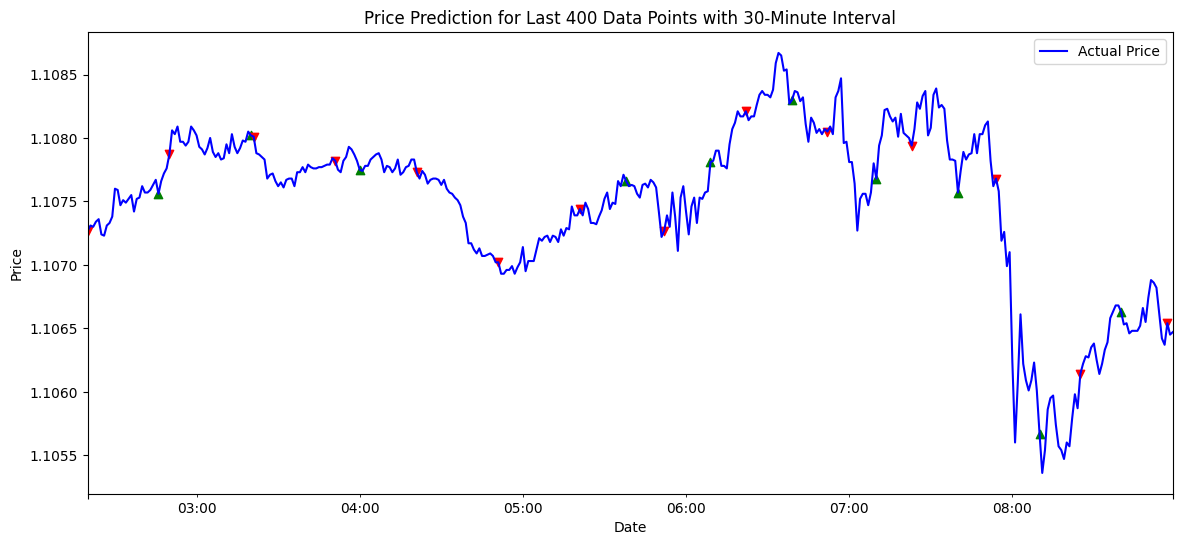

In [ ]:
from datetime import timedelta

predicted_directions = model.predict(X)
df['Predicted_Direction'] = predicted_directions

# Select the last 400 data points
df_last_400 = df[-400:]

# Plot actual prices and predicted buy/sell points
plt.figure(figsize=(14, 6))
df_last_400['Close'].plot(label='Actual Price', color='blue')

previous_buy_time = None
previous_sell_time = None

for index, row in df_last_400.iterrows():
    if row['Predicted_Direction'] == 1 and (previous_buy_time is None or (index - previous_buy_time) >= timedelta(minutes=30)):
        plt.scatter(index, row['Close'], color='green', marker='^')
        previous_buy_time = index

    if row['Predicted_Direction'] == 0 and (previous_sell_time is None or (index - previous_sell_time) >= timedelta(minutes=30)):
        plt.scatter(index, row['Close'], color='red', marker='v')
        previous_sell_time = index

plt.title('Price Prediction for Last 400 Data Points with 30-Minute Interval')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()
